In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [12]:
print (dir(sklearn.model_selection))

['BaseCrossValidator', 'GridSearchCV', 'GroupKFold', 'GroupShuffleSplit', 'KFold', 'LeaveOneGroupOut', 'LeaveOneOut', 'LeavePGroupsOut', 'LeavePOut', 'ParameterGrid', 'ParameterSampler', 'PredefinedSplit', 'RandomizedSearchCV', 'RepeatedKFold', 'RepeatedStratifiedKFold', 'ShuffleSplit', 'StratifiedKFold', 'StratifiedShuffleSplit', 'TimeSeriesSplit', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_search', '_split', '_validation', 'check_cv', 'cross_val_predict', 'cross_val_score', 'cross_validate', 'fit_grid_point', 'learning_curve', 'permutation_test_score', 'train_test_split', 'validation_curve']


In [13]:
data=pd.read_excel('Test.xlsx')
data # target variable is price 

,nr,sft,bedrooms,water,bathrooms,price
0,1,150,3,1,3,6500.000000
1,2,160,3,1,3,7000.000000
2,3,200,2,0,2,9000.000000
3,4,250,3,0,3,10000.000000
4,5,300,2,1,2,12000.000000
5,6,350,4,0,4,13500.000000
6,7,400,5,1,5,14000.000000
7,8,320,2,0,3,10285.714286
8,9,288,3,1,2,10826.530612


In [14]:
x=np.array(data[['sft','bedrooms', 'water', 'bathrooms']])
y=np.array(data['price'])
print (x)
print (y)

[[150   3   1   3]
 [160   3   1   3]
 [200   2   0   2]
 [250   3   0   3]
 [300   2   1   2]
 [350   4   0   4]
 [400   5   1   5]
 [320   2   0   3]
 [288   3   1   2]]
[ 6500.          7000.          9000.         10000.
 12000.         13500.         14000.         10285.71428571
 10826.53061224]


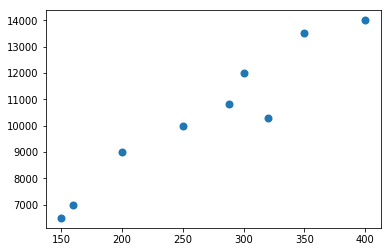

In [15]:
plt.scatter(data['sft'], data['price'], linewidths=2.0,data=data)
plt.show()

In [16]:
print (dir(sns))

['FacetGrid', 'JointGrid', 'PairGrid', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_orig_rc_params', 'algorithms', 'axes_style', 'axisgrid', 'barplot', 'blend_palette', 'boxplot', 'categorical', 'choose_colorbrewer_palette', 'choose_cubehelix_palette', 'choose_dark_palette', 'choose_diverging_palette', 'choose_light_palette', 'clustermap', 'cm', 'color_palette', 'countplot', 'crayon_palette', 'crayons', 'cubehelix_palette', 'dark_palette', 'desaturate', 'despine', 'distplot', 'distributions', 'diverging_palette', 'external', 'factorplot', 'get_dataset_names', 'heatmap', 'hls_palette', 'husl_palette', 'jointplot', 'kdeplot', 'light_palette', 'lmplot', 'load_dataset', 'lvplot', 'matrix', 'miscplot', 'mpl', 'mpl_palette', 'pairplot', 'palettes', 'palplot', 'plotting_context', 'pointplot', 'rcmod', 'regplot', 'regression', 'reset_defaults', 'reset_orig', 'residplot', 'rugplot', 'saturate', 'set', 'set

                 nr       sft  bedrooms     water  bathrooms     price
nr         1.000000  0.815577  0.182574 -0.086603   0.136931  0.713137
sft        0.815577  1.000000  0.481117 -0.125402   0.527771  0.959765
bedrooms   0.182574  0.481117  1.000000  0.237171   0.875000  0.490579
water     -0.086603 -0.125402  0.237171  1.000000   0.000000 -0.127807
bathrooms  0.136931  0.527771  0.875000  0.000000   1.000000  0.464605
price      0.713137  0.959765  0.490579 -0.127807   0.464605  1.000000


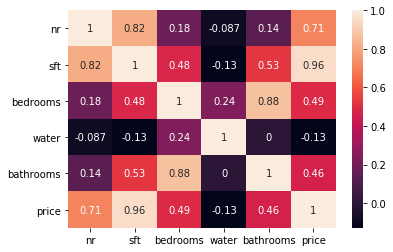

In [17]:
corr=data.corr()
print (corr)
sns.heatmap(corr, annot=True)


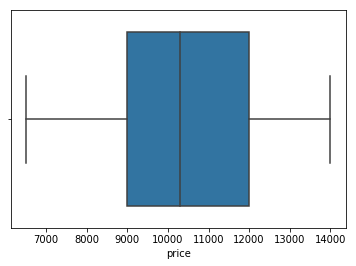

In [18]:
sns.boxplot(data['price'])

In [19]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3, random_state=3)
print (x_train)
print ('\n\n')
print (x_test)
print ('\n\n')
print (y_train, y_test)

[[300   2   1   2]
 [350   4   0   4]
 [150   3   1   3]
 [250   3   0   3]
 [160   3   1   3]
 [288   3   1   2]]



[[400   5   1   5]
 [200   2   0   2]
 [320   2   0   3]]



[12000.         13500.          6500.         10000.
  7000.         10826.53061224] [14000.          9000.         10285.71428571]


In [20]:
model=LinearRegression()
model.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
intercept=model.intercept_
print (intercept)

1267.4418604650782


In [22]:
coefficient=model.coef_
print (coefficient)
# means unit increase of x , responsive(y) increasing by 50, there is positive 50,
# means unit increase of x , responsive(y) decreasing by 750, there is positive-750,

[  35.75581395 -747.30659706  148.25581395  677.5391552 ]


In [23]:
pred1=model.predict(x_train)
print (pred1)
print (y_train)


[12002.90697674 13502.90697674  6569.76744186  9997.09302326
  6927.3255814  10826.53061224]
[12000.         13500.          6500.         10000.
  7000.         10826.53061224]


In [24]:
y_pred=model.predict(x_test)
print (y_pred)
print (y_test)
error=(y_test-y_pred)
error
err=np.average(error)
err
x_test

[15369.18604651  8279.06976744 13247.30659706]
[14000.          9000.         10285.71428571]


array([[400,   5,   1,   5],
       [200,   2,   0,   2],
       [320,   2,   0,   3]], dtype=int64)

In [26]:
#creating data frames actual Vs predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,14000.000000,15369.186047
1,9000.000000,8279.069767
2,10285.714286,13247.306597


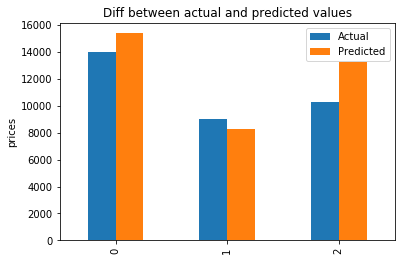

In [27]:
df.plot(kind='bar')
plt.title('Diff between actual and predicted values')
plt.ylabel('prices')
plt.show()

In [28]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1683.9028634709819
Mean Squared Error: 3721813.2829284663
Root Mean Squared Error: 1929.2001666308415


In [29]:
print (model.score(x_train, y_train))
print (model.score(x_test, y_test))

0.9997335014422085
0.17188715551389808
